# SISEPUEDE Transformations - A Tutorial

In [1]:
import copy
import datetime as dt
import importlib # needed so that we can reload packages
import ipywidgets as wdg
import matplotlib.pyplot as plt
import os, os.path
import numpy as np
import pandas as pd
import pathlib
import sys
import time
from typing import Union
import warnings
warnings.filterwarnings("ignore")

# add SISEPUEDE to path
dir_py = pathlib.Path(os.path.realpath(".")).parents[1]
if str(dir_py) not in sys.path:
    sys.path.append(str(dir_py))

    
##  IMPORT SISEPUEDE EXAMPLES AND TRANSFORMERS

from sisepuede.manager.sisepuede_examples import SISEPUEDEExamples
import sisepuede.core.support_classes as sc
import sisepuede.transformers as trf
import sisepuede.utilities._toolbox as sf


# Transformations: what are they?

Transformations are well-defined in the SISEPUEDE ecosystem. A ``Transformation`` is a parameterization of a``Transformer``. Both are classes in SISEPUEDE, with ``Transformations`` and ``Transformers`` acting as collections of these classes, respectively. Each ``Transformer`` class is a function that modifies trajectories to reflect policy outcomes; documentation for each of the 60+ functions is available on readthedocs. 

``Transformation`` objects allow users to define parameterizations of ``Transformer`` objects using configuration files in a directory. This directory contains a configuration for:

1. All transformations
1. General configuraiton and information on the baseline
1. The strategy definition file, which combines transformations



See sisepuede.readthedocs.io for more information on transformations, transformers, and strategies.



# Let's explore the objects that underly all transformations: ``Transformers``

In [34]:
?trf.Transformers

Init signature:
trf.Transformers(
    dict_config: Dict,
    code_baseline: str = 'TFR:BASE',
    df_input: Optional[pandas.core.frame.DataFrame] = None,
    field_region: Optional[str] = None,
    logger: Optional[logging.Logger] = None,
    regex_code_structure: re.Pattern = re.compile('TFR:(\\D*):(.*$)'),
    regex_template_prepend: str = 'sisepuede_run',
    **kwargs,
)
Docstring:     
Build collection of Transformers that are used to define transformations.

Includes some information on

Initialization Arguments
------------------------
- dict_config: configuration dictionary used to pass parameters to 
    transformations. See ?TransformerEnergy._initialize_parameters() for
    more information on requirements.
- dir_jl: location of Julia directory containing Julia environment and 
    support modules
- fp_nemomod_reference_files: directory housing reference files called by
    NemoMod when running electricity model. Required to access data in 
    EnergyProduction. Needs the fol

##  To get available `Transformer` classes, we need to start with a base dataset

- `Transformer` objects for SISEPUEDE are stored in the `Transformers` object
- `Transformers` requires an input data frame to transform; this data frame should be a set of raw SISEPUEDE inputs
    - Use `SISEPUEDEExamples()` to pull example data; examples are listed in `SISEPUEDEExamples.all_examples`

In [2]:
examples = SISEPUEDEExamples()
df_input = examples("input_data_frame")
# note to james -- make this a fake country name (or example_country e.g.)


##  We can build the `Transformers` class now

In [3]:
import sisepuede.transformers.transformers as trfs
importlib.reload(trfs)
transformers = trfs.Transformers(
    {},
    df_input = df_input,
)

# set some shortcuts
mat = transformers.model_attributes
time_periods = sc.TimePeriods(mat);


In [5]:
# check requirements
?trf.Transformers

Init signature:
trf.Transformers(
    dict_config: Dict,
    code_baseline: str = 'TFR:BASE',
    df_input: Optional[pandas.core.frame.DataFrame] = None,
    field_region: Optional[str] = None,
    logger: Optional[logging.Logger] = None,
    regex_code_structure: re.Pattern = re.compile('TFR:(\\D*):(.*$)'),
    regex_template_prepend: str = 'sisepuede_run',
    **kwargs,
)
Docstring:     
Build collection of Transformers that are used to define transformations.

Includes some information on

Initialization Arguments
------------------------
- dict_config: configuration dictionary used to pass parameters to 
    transformations. See ?TransformerEnergy._initialize_parameters() for
    more information on requirements.
- dir_jl: location of Julia directory containing Julia environment and 
    support modules
- fp_nemomod_reference_files: directory housing reference files called by
    NemoMod when running electricity model. Required to access data in 
    EnergyProduction. Needs the fol

###  `Transformers` allows you to access all `Transformer` objects
- A `Transformer` is akin to a lever in the XLRM framework
- Each `Transformer` is associated with a variable (or set of variables) that represent a feasible, literature-based change in outcome due to at least one intervention(s)
- The list of available `Transformer` classes is available in `Transformers.all_transformers`
- Get a transformer using `Transformers.get_transformer`

In [6]:
transformers.all_transformers

['TFR:AGRC:DEC_CH4_RICE',
 'TFR:AGRC:DEC_EXPORTS',
 'TFR:AGRC:DEC_LOSSES_SUPPLY_CHAIN',
 'TFR:AGRC:INC_CONSERVATION_AGRICULTURE',
 'TFR:AGRC:INC_PRODUCTIVITY',
 'TFR:BASE',
 'TFR:CCSQ:INC_CAPTURE',
 'TFR:ENTC:DEC_LOSSES',
 'TFR:ENTC:LEAST_COST_SOLUTION',
 'TFR:ENTC:TARGET_CLEAN_HYDROGEN',
 'TFR:ENTC:TARGET_RENEWABLE_ELEC',
 'TFR:FGTV:DEC_LEAKS',
 'TFR:FGTV:INC_FLARE',
 'TFR:INEN:INC_EFFICIENCY_ENERGY',
 'TFR:INEN:INC_EFFICIENCY_PRODUCTION',
 'TFR:INEN:SHIFT_FUEL_HEAT',
 'TFR:IPPU:DEC_CLINKER',
 'TFR:IPPU:DEC_DEMAND',
 'TFR:IPPU:DEC_HFCS',
 'TFR:IPPU:DEC_N2O',
 'TFR:IPPU:DEC_OTHER_FCS',
 'TFR:IPPU:DEC_PFCS',
 'TFR:LNDU:DEC_DEFORESTATION',
 'TFR:LNDU:DEC_SOC_LOSS_PASTURES',
 'TFR:LNDU:INC_REFORESTATION',
 'TFR:LNDU:INC_SILVOPASTURE',
 'TFR:LNDU:PLUR',
 'TFR:LSMM:INC_CAPTURE_BIOGAS',
 'TFR:LSMM:INC_MANAGEMENT_CATTLE_PIGS',
 'TFR:LSMM:INC_MANAGEMENT_OTHER',
 'TFR:LSMM:INC_MANAGEMENT_POULTRY',
 'TFR:LVST:DEC_ENTERIC_FERMENTATION',
 'TFR:LVST:DEC_EXPORTS',
 'TFR:LVST:INC_PRODUCTIVITY',
 'TFR

###  A `Transformer` is callable
- When you get it, you can call it
- When called, it will generate a dataframe that is transformed under default parameters associated with each Transformer

In [4]:
tr_medium_duty = transformers.get_transformer("TFR:TRNS:SHIFT_FUEL_MEDIUM_DUTY")

# you can call it 
tr_medium_duty()

,region,time_period,avgload_trns_freight_tonne_per_vehicle_aviation,avgload_trns_freight_tonne_per_vehicle_rail_freight,avgload_trns_freight_tonne_per_vehicle_road_heavy_freight,avgload_trns_freight_tonne_per_vehicle_water_borne,avgmass_lvst_animal_buffalo_kg,avgmass_lvst_animal_cattle_dairy_kg,avgmass_lvst_animal_cattle_nondairy_kg,avgmass_lvst_animal_chickens_kg,...,frac_lndu_utilization_rate_pastures,ef_lndu_sequestration_grasslands_kt_co2_ha,ef_lndu_sequestration_other_kt_co2_ha,ef_lndu_sequestration_pastures_kt_co2_ha,ef_lndu_sequestration_settlements_kt_co2_ha,ef_lndu_sequestration_shrublands_kt_co2_ha,ef_lndu_sequestration_wetlands_kt_co2_ha,frac_entc_ccs_achievement_fp_hydrogen_reformation_ccs,frac_entc_ccs_achievement_pp_coal_ccs,frac_entc_ccs_achievement_pp_gas_ccs
0,costa_rica,0,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.75,8.901248,5.396741,9.895949,3.029743,5.962686,3.039845,1.0,1.0,1.0
1,costa_rica,1,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.75,8.901248,5.396741,9.895949,3.029743,5.962686,3.039845,1.0,1.0,1.0
2,costa_rica,2,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.75,8.901248,5.396741,9.895949,3.029743,5.962686,3.039845,1.0,1.0,1.0
3,costa_rica,3,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.75,8.901248,5.396741,9.895949,3.029743,5.962686,3.039845,1.0,1.0,1.0
4,costa_rica,4,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.75,8.901248,5.396741,9.895949,3.029743,5.962686,3.039845,1.0,1.0,1.0
5,costa_rica,5,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.75,8.901248,5.396741,9.895949,3.029743,5.962686,3.039845,1.0,1.0,1.0
6,costa_rica,6,70.0,4082.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.75,8.901248,5.396741,9.895949,3.029743,5.962686,3.039845,1.0,1.0,1.0
7,costa_rica,7,70.0,4082.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.75,8.901248,5.396741,9.895949,3.029743,5.962686,3.039845,1.0,1.0,1.0
8,costa_rica,8,70.0,4082.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.75,8.901248,5.396741,9.895949,3.029743,5.962686,3.039845,1.0,1.0,1.0
9,costa_rica,9,70.0,4082.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.75,8.901248,5.396741,9.895949,3.029743,5.962686,3.039845,1.0,1.0,1.0


###  A `Transfomer` is parameterized using keyword arguments
- No need to pass `df_input` unless you want to apply it to a data frame not used to instantiation the `Transformers` collection
- However, other arguments can be varied
- Full documentation of all `Transformer` functions is available at the [SISEPUEDE readthedocs](https://sisepuede.readthedocs.io/en/latest/transformers.html)
- Let's look at the doc string of `tr_medium_duty.function`, the base function in the transformer that we called (can also use `?tr_medium_duty`, but it will not show the signature)
    - `categories` can be varied to any TRNS category
    - `dict_allocation_fuels_target` is used to allocate the magnitude of the fuel shift across target fuels; 
        - `dict_allocation_fuels_target = {"fuel_electricity": 1.0}` means that 100% of the magnitude will be shifted away from `fuels_source`to electricity
    - `fuels_source` give fuels that are shifted away from. By default, this `Transformer` only shifts away from diesel and gas
    - `magnitude`: fraction of source fuel mix that is shifted to fuels specified in `dict_allocation_fuels_target`
    - `vec_implementation_ramp`: the implementation ramp vector. See discussion below for more information on how this can be specified

In [5]:
?tr_medium_duty.function


Signature:
tr_medium_duty.function(
    categories: List[str] = ['road_heavy_freight', 'road_heavy_regional', 'public'],
    dict_allocation_fuels_target: Optional[dict] = None,
    df_input: Optional[pandas.core.frame.DataFrame] = None,
    fuels_source: List[str] = ['fuel_diesel', 'fuel_gasoline'],
    magnitude: float = 0.7,
    strat: Optional[int] = None,
    vec_implementation_ramp: Optional[numpy.ndarray] = None,
) -> pandas.core.frame.DataFrame
Docstring:
Implement the "Fuel-Switch Medium Duty" TRNS transformer on input DataFrame df_input. By default, transfers mangitude to electricity from gasoline and diesel; e.g., with magnitude = 0.7, then 70% of diesel and gas demand are transfered to fuels in fuels_target. The rest of the fuel demand is then transferred to hydrogen. 

Parameters
----------
categories : List[str]
    Transportation categories to include; defaults to 
    [
        "road_heavy_freight", 
        "road_heavy_regional", 
        "public"
    ]
dict_allocation

# Now, let's examine `Transformation` classes

- A `Transformation` is a parameterization of a `Transformer`
- Let's look at fuel shifting medium-duty
- A `Transformation` can be defined using a dictionary or a configuration file. 
    - **NOTE**: A value of `None` can be passed in a YAML configuration using `null`


-----

#### For this example, we'll walk through a dictionary. 

The following keys are required in a dictionary/yaml file:

- `citations`: list of bibtex citations to call. These bibtex citations can be in the default SISEPUEDE library `sisepuede/docs/source/citations.bib` or provided in a Transformation definition directory in `citations.bib`
- `description`: optional description to provide. 
    - **NOTE**: Descriptions can be include citations as \\cite{CITEKEY}
- `identifiers` (**required**): 
    - `transformation_code` (**required**): specify a transformation code. These codes are used to define strategies. **NOTE: CANNOT CONTAIN "|" CHARACTER**
    - `transformation_name` (optional): optional name for the transformation, but it is recommended to provide one. This name is used in building automated reports and display tables.
- `parameters` (**required**): Parameters--or keyword arguments to the function--are passed as a dictionary associated with this key. 
    - Parameters included in here *must* be keyword arguments to the `Transformer` that will be parameterized
- `transformer` (**required**): The `Transformer` code that this transformation will parameterize. 
        

In [6]:
# Default setup
dict_setup = {
    "citations": ["xyz", "xbm"],
    "identifiers": {
        "transformation_code": "TX:TRNS:SHIFT_FUEL_MEDIUM_DUTY",
        "transformation_name": "Shift fuel for medium duty vehicles"
    },
    "description": "blah blah blah",
    "parameters": {
        "categories": [
            "road_heavy_freight",
            "road_heavy_regional",
            "public"
        ],
        "dict_allocation_fuels_target": None,
        "fuels_source": [
            "fuel_diesel", 
            "fuel_gasoline"
        ],
        "magnitude": 0.3,
        "vec_implementation_ramp": {
            "alpha_logistic": 0,
            "n_tp_ramp": None,
            "tp_0_ramp": None,
            "window_logistic": [-8, 8]
        }
    },
    "transformer": "TFR:TRNS:SHIFT_FUEL_MEDIUM_DUTY"
}


# built the Transformation using dict_setup
transformation_1 = trf.Transformation(
    dict_setup,
    transformers,
)

# Look at the transformed variables for one of the categories

The transformation shifts fuel sources for three categories--`road_heavy_freight`, `road_heavy_regional`, and `public`--into electricity and hydrogen. Let's look at fuel fractions under two conditions--without the tranformation + with the transformation-for only the `public` transportation category.

<Axes: title={'center': 'Transformation 1 Inputs'}>

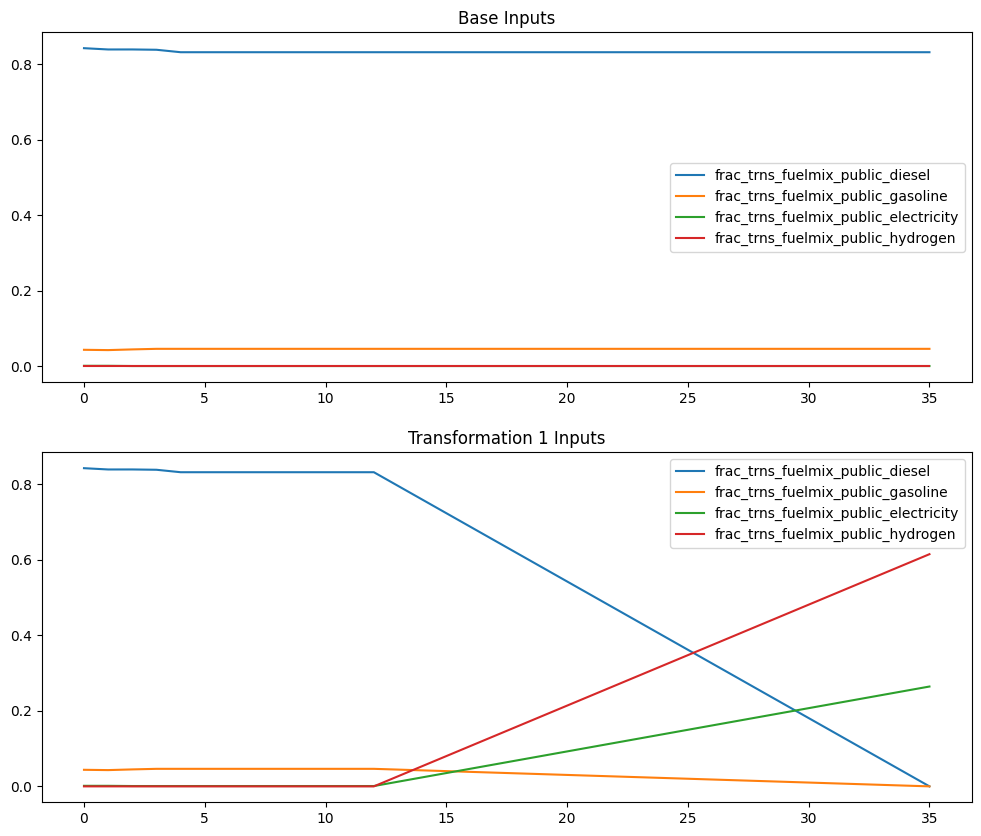

In [7]:
# First, let's build the fields
cats = ["public"]
fields = []

for fuel_name in ["Diesel", "Gasoline", "Electricity", "Hydrogen"]:
    fields += mat.build_variable_fields(
        f"Transportation Mode Fuel Fraction {fuel_name}",
        restrict_to_category_values = cats,
    )


# execute the transformation (can also use transformation_1.function())
df_input_transformation_1 = transformation_1()

# build a plot
fig, ax = plt.subplots(2, 1, figsize = (12, 10))

# base
ax[0].set_title("Base Inputs")
df_input[fields].plot(ax = ax[0])

# transformed
ax[1].set_title("Transformation 1 Inputs")
df_input_transformation_1[fields].plot(ax = ax[1])

##  There are 2 approaches available to change the timing or shape of the implementation ramp

The `implementation_ramp` is commonly specified using `vec_implementation_ramp` across SISEPUEDE. 

- The implementation ramp represents what fraction of the magnitude of a transformation is implemented across time. It takes values in [0, 1] and must have the same length as the original data
- If not specified, it defaults to start at the current year + 2 and end at the final time period
- **IMPORTANT NOTE**: When building Transformation directories, you can specify a default `vec_implementation_ramp` in the general config (under the `general` key); one for the baseline (under the `baseline` key in config_general); and, if desired, a unique one for any of the Transformations in the directory. In these configuration files--as with setup dictionaries--`vec_implementation` can be specified as a dictionary or a vector of values.

----


###  Approach 1: set the implementation ramp using a dictionary (preferred approach)
 

Let's demonstrate one approach to setting the implementation ramp. First, we can build one using parameters in a dictionary. The key parameters are:

- `alpha` (mix fraction): fraction of the ramp that is logistic. For all linear, set to 0.0; for completely logistic, set to 1.0
- `tp_0_ramp`: final time period == 0 in the ramp
- `window_logistic`: $(w_0, w_1)$ the window of the standard logit function [ $f(x) = (1 + e^{-x})^{-1}$ ] used to create the shape. In general, the min and max should be symmetric:
     - if $|w_0| < |w_1|$ and $w_0 < 0, w_1 > 0$, then the ramp will grow quickly and reach near-full implementation early; 
     - if $|w_0| > |w_1|$ and $w_0 < 0, w_1 > 0$, then the ramp will grow slowly and reach near-full implementation late; 
- `d` (not in interactive): value where logit == 0.5. For advanced use.

```
{
    "vec_implementation_ramp": {
        "alpha_logistic": alpha,
        "n_tp_ramp": len(time_periods.all_time_periods),
        "tp_0_ramp": tp_0_ramp,
        "window_logistic": (window_min, window_max)
    }
}
```

----

##  Now, we can interact with a widget to explore how these shape parameters change the implementation ramp


In [8]:
def interactive_df_plot(
    df: pd.DataFrame,
    fields_plot: list,
) -> wdg.interactive:
    """
    Build an interactive ipywidget time seris plot for df. Will ignore fields specified
        in `fields_ignore`.
    """
    
    # build some widgets
    slider_alpha = wdg.FloatSlider(
        description = "$\\alpha$",
        min = 0.0, 
        max = 1.0, 
        step = 0.01,
        value = 0.0,
    )
    slider_tp_0 = wdg.IntSlider(
        description = "$t_0^{(ramp)}$",
        min = min(time_periods.all_time_periods), 
        max = max(time_periods.all_time_periods),
        value = (dt.datetime.now().year + 2 - time_periods.all_years[0]) # default
    )
    slider_window_max = wdg.FloatSlider(
        description = "$w_{max}$",
        max = 10.0,
        min = 0.0, 
        value = 8.0,
    )
    slider_window_min = wdg.FloatSlider(
        description = "$w_{min}$",
        max = 0.0,
        min = -10.0, 
        value = -8.0,
    )
        

    # placeholder for other actions
    df_plot = df

    # function to allow interaction
    def show_transformation(
        alpha: float,
        tp_0_ramp: int,
        window_max: float,
        window_min: float,
    ) -> 'plt.plot()':
        """
        Plot output fields from the model run on the df_model_data data frame
        """
        

        # update
        dict_setup_cur = copy.deepcopy(dict_setup)
        (
            dict_setup_cur
            .get("parameters")
            .update(
                {
                    "vec_implementation_ramp": {
                        "alpha_logistic": alpha,
                        "n_tp_ramp": len(time_periods.all_time_periods),
                        "tp_0_ramp": tp_0_ramp,
                        "window_logistic": (window_min, window_max)
                    }
                }
            )
        )


        # build a new transformation with the implementation ramp
        transformation_cur = trf.Transformation(
            dict_setup_cur,
            transformers,
        )

        # execute the transformation and plot (can also use transformation_1.function())
        df_input_transformation_cur = transformation_cur()
        
        # initialize plot
        fig, ax = plt.subplots(1, 1, figsize = (12, 6))
        ax.set_title("Transformation with modified vec_implementation_ramp")
        df_input_transformation_cur[fields_plot].plot(ax = ax, )
        
        plt.show()

        return None
    
    

    out = wdg.interactive(
        show_transformation,
        alpha = slider_alpha,
        tp_0_ramp = slider_tp_0,
        window_max = slider_window_max,
        window_min = slider_window_min,
    )

    return out


interactive_df_plot(
    df_input,
    fields,
)

interactive(children=(FloatSlider(value=0.0, description='$\\alpha$', max=1.0, step=0.01), IntSlider(value=12,…

###  We can read more about the parameters in the `_toolbox` function `ramp_vector`

In [12]:
# check the characteristics of ramp vector
?sf.ramp_vector

Signature:
sf.ramp_vector(
    n: int,
    alpha_logistic: float = 0.0,
    d: Union[float, int] = 0,
    r_0: int = 0,
    r_1: Optional[int] = None,
    window_logistic: Tuple[int, int] = (-8, 8),
) -> float
Docstring:
Build a ramp vector for n time periods. Allows for the specifcation of a 
    linear vector, sigmoid, window within sigmoid, or some mix of the two.
    

Function Arguments
------------------
- n: number of time periods (total)

Keyword Arguments
-----------------
- alpha_logistic: fraction of ramp function that is associated with the 
    logistic. (1 - alpha_logistic) gives the fraction that is linear.
- d: centroid for logistic function in window
- r_0: last period == 0; e.g., if r_0 = 4 and n = 10, then in a linear 
    function, we have
- r_1: first period == 1. If None, defaults to n
- window_logistic: window in standard logistic function (i.e., 
    1/(1 + e^(-x)) that is shifted and stretched to create the sigmoid 
    component. By default, use -8 to 8.
    *

###  Approach 2: directly set the implementation ramp

Another approach to setting the implementation ramp is to to build one from scratch. It must take values in [0, 1], start with 0, and end with 1. This approach can be useful for non-traditional curves, or for a symmetric benchmarks that must be met over time. 

The time periods in the example range from 0-35 (2015 to 2050); let's suppose we have a transformation that begins in 2030 (the last value == 0 in this case) with 80% implemenation by 2040 and 100% by 2050. 

``vec_implementation_ramp = np.concatenate([np.zeros(16), np.arange(1, 11)*0.08, np.arange(1, 11)*0.02 + 0.8])``

**NOTE**: the toolbox (`sisepuede.utilities._toolbox`) includes the `ramp_vector` function, which is extremely useful for building vectors from scratch.

<Axes: title={'center': 'Transformation 2 Data'}>

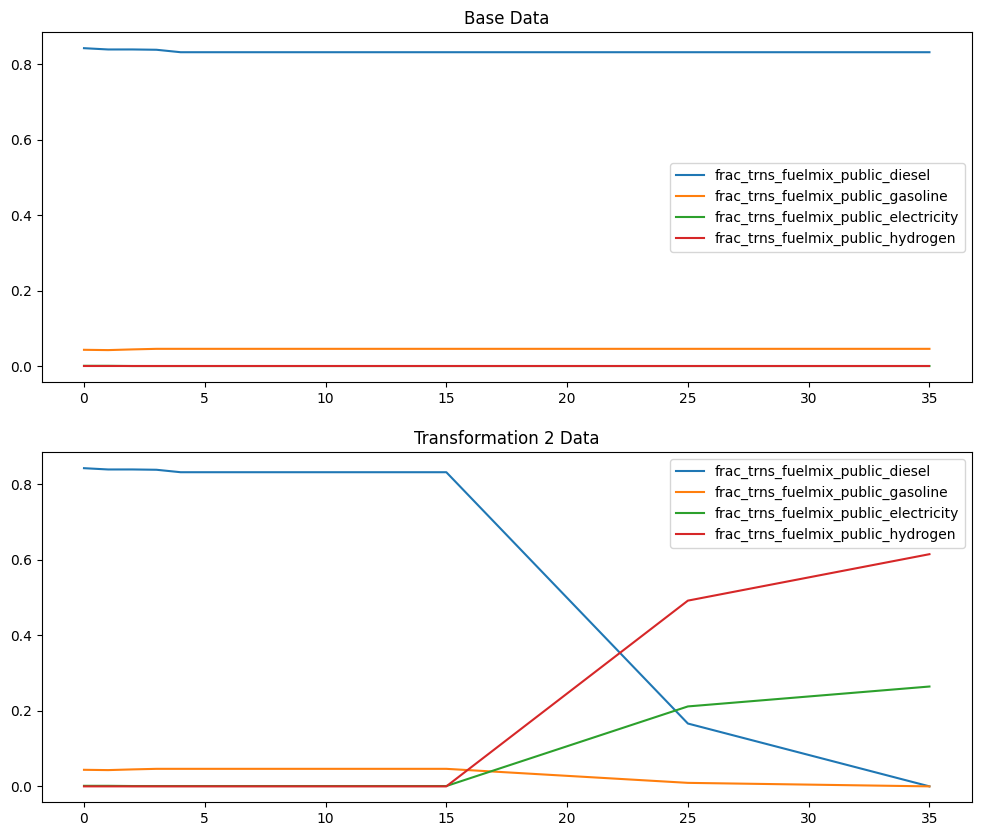

In [11]:
# set the vector--should be a numpy array
vec_implementation_ramp = np.concatenate(
    [
        np.zeros(16),
        np.arange(1, 11)*0.08,
        np.arange(1, 11)*0.02 + 0.8
    ]
)

# update
dict_setup_2 = copy.deepcopy(dict_setup)
dict_setup_2.get("parameters").update({"vec_implementation_ramp": vec_implementation_ramp})



# build a new transformation with the implementation ramp
transformation_2 = trf.Transformation(
    dict_setup_2,
    transformers,
)

# execute the transformation (can also use transformation_1.function())
df_input_transformation_2 = transformation_2()

fig, ax = plt.subplots(2, 1, figsize = (12, 10))

# base
ax[0].set_title("Base Data")
df_input[fields].plot(ax = ax[0])

# transformed
ax[1].set_title("Transformation 2 Data")
df_input_transformation_2[fields].plot(ax = ax[1])

# How do we define a `Transformations` object (which are required to build `Strategies`)?
- `Transformations` are collections of `Transformation` objects
- They are defined in collections of configuration files stored in a _Strategy Directory_
    - The _Strategy Directory_ contains information about transformations, strategic combinations, and even citations
- The easiest way to begin is to instantiate a default strategy directory;
    - It will export one `Transformation` YAML configuration file for each `Transformer` object and prepopulate with defaults. From there, you can modify parameters or duplicate as needed. 
    - Each Transformation **must** have a unique Transformation code to be counted
    - Note that there can be multiple `Transformation` files associated with a single `Transformer`
    - A default strategy definition file is also created that includes:
        - Base case (required)
        - All singleton strategies (1:1 mapping with `Transformation` objects that are defined)
        - Sectoral combinations (the instantation chooses one `Transformation` per `Transformer` to include)
        - All (using the same one `Transformation` per `Transformer`)

In [12]:
# set an ouput path and instantiate
dir_transformations_out = "/Users/usuario/Desktop/testing_transformations_part_two"

trf.instantiate_default_strategy_directory(
    transformers,
    dir_transformations_out,
)


In [28]:
# then, you can load this back in after modifying (play around with it)
transformations = trf.Transformations(
    dir_transformations_out,
    transformers = transformers,
)
transformations.attribute_transformation.table



,transformation_id,transformation_code,transformation_name,description,citations,path
0,0,TX:BASE,None,None,None,None
1,1,TX:AGRC:DEC_CH4_RICE,Default Value - AGRC: Improve rice management,Reduce :math:`\text{CH}_4` emissions from rice...,None,/Users/usuario/Desktop/testing_transformations...
2,2,TX:AGRC:DEC_EXPORTS,Default Value - AGRC: Decrease Exports,Decrease agricultural exports by 50% (relative...,None,/Users/usuario/Desktop/testing_transformations...
3,3,TX:AGRC:DEC_LOSSES_SUPPLY_CHAIN,Default Value - AGRC: Reduce supply chain losses,Reduce waste food waste in the agricultural (c...,None,/Users/usuario/Desktop/testing_transformations...
4,4,TX:AGRC:INC_CONSERVATION_AGRICULTURE,Default Value - AGRC: Expand conservation agri...,| Decrease soil organic carbon loss in cropla...,None,/Users/usuario/Desktop/testing_transformations...
...,...,...,...,...,...,...
60,60,TX:WASO:INC_CAPTURE_BIOGAS,Default Value - WASO: Increase biogas capture,Increase fraction of biogas captured from land...,None,/Users/usuario/Desktop/testing_transformations...
61,61,TX:WASO:INC_ENERGY_FROM_BIOGAS,Default Value - WASO: Biogas for energy produc...,Increase the fraction of biogas that is collec...,None,/Users/usuario/Desktop/testing_transformations...
62,62,TX:WASO:INC_ENERGY_FROM_INCINERATION,Default Value - WASO: Incineration for energy ...,None,None,/Users/usuario/Desktop/testing_transformations...
63,63,TX:WASO:INC_LANDFILLING,Default Value - WASO: Increase landfilling,Increase fraction of waste that is otherwise u...,None,/Users/usuario/Desktop/testing_transformations...


In [15]:
# look at all codes that were accepts
transformations.all_transformation_codes

['TX:AGRC:DEC_CH4_RICE',
 'TX:AGRC:DEC_EXPORTS',
 'TX:AGRC:DEC_LOSSES_SUPPLY_CHAIN',
 'TX:AGRC:INC_CONSERVATION_AGRICULTURE',
 'TX:AGRC:INC_PRODUCTIVITY',
 'TX:BASE',
 'TX:CCSQ:INC_CAPTURE',
 'TX:ENTC:DEC_LOSSES',
 'TX:ENTC:LEAST_COST_SOLUTION',
 'TX:ENTC:TARGET_CLEAN_HYDROGEN',
 'TX:ENTC:TARGET_RENEWABLE_ELEC',
 'TX:FGTV:DEC_LEAKS',
 'TX:FGTV:INC_FLARE',
 'TX:INEN:INC_EFFICIENCY_ENERGY',
 'TX:INEN:INC_EFFICIENCY_PRODUCTION',
 'TX:INEN:SHIFT_FUEL_HEAT',
 'TX:IPPU:DEC_CLINKER',
 'TX:IPPU:DEC_DEMAND',
 'TX:IPPU:DEC_HFCS',
 'TX:IPPU:DEC_N2O',
 'TX:IPPU:DEC_OTHER_FCS',
 'TX:IPPU:DEC_PFCS',
 'TX:LNDU:DEC_DEFORESTATION',
 'TX:LNDU:DEC_SOC_LOSS_PASTURES',
 'TX:LNDU:INC_REFORESTATION',
 'TX:LNDU:INC_REFORESTATION_AGGRESSIVE',
 'TX:LNDU:INC_SILVOPASTURE',
 'TX:LNDU:PLUR',
 'TX:LSMM:INC_CAPTURE_BIOGAS',
 'TX:LSMM:INC_MANAGEMENT_CATTLE_PIGS',
 'TX:LSMM:INC_MANAGEMENT_OTHER',
 'TX:LSMM:INC_MANAGEMENT_POULTRY',
 'TX:LVST:DEC_ENTERIC_FERMENTATION',
 'TX:LVST:DEC_EXPORTS',
 'TX:LVST:INC_PRODUCTIVITY'

In [59]:
# explore transformations
tr_landfilling = transformations.get_transformation("TX:WASO:INC_LANDFILLING")
tr_landfilling()

,region,time_period,avgload_trns_freight_tonne_per_vehicle_aviation,avgload_trns_freight_tonne_per_vehicle_rail_freight,avgload_trns_freight_tonne_per_vehicle_road_heavy_freight,avgload_trns_freight_tonne_per_vehicle_water_borne,avgmass_lvst_animal_buffalo_kg,avgmass_lvst_animal_cattle_dairy_kg,avgmass_lvst_animal_cattle_nondairy_kg,avgmass_lvst_animal_chickens_kg,...,ef_ippu_tonne_cf4_per_tonne_production_electronics,ef_ippu_tonne_cf4_per_tonne_production_metals,ef_ippu_tonne_c3f8_per_tonne_production_chemicals,ef_ippu_tonne_c3f8_per_tonne_production_electronics,ef_ippu_tonne_c4f10_per_mmm_gdp_product_use_ods_other,ef_ippu_tonne_c4f10_per_tonne_production_chemicals,ef_ippu_tonne_c6f14_per_mmm_gdp_product_use_ods_other,ef_ippu_tonne_c6f14_per_tonne_production_chemicals,ef_ippu_tonne_cc4f8_per_tonne_production_chemicals,ef_ippu_tonne_cc4f8_per_tonne_production_electronics
0,costa_rica,0,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.000002,4.204879e-07,0.0,1.515048e-07,0.0,0.0,0.0,0.0,0.0,5.669821e-08
1,costa_rica,1,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.000002,2.134675e-07,0.0,1.313925e-07,0.0,0.0,0.0,0.0,0.0,5.185820e-08
2,costa_rica,2,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.000002,1.821067e-07,0.0,1.060066e-07,0.0,0.0,0.0,0.0,0.0,5.269348e-08
3,costa_rica,3,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.000002,2.094712e-07,0.0,1.093024e-07,0.0,0.0,0.0,0.0,0.0,5.500450e-08
4,costa_rica,4,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.000002,3.446161e-07,0.0,1.046451e-07,0.0,0.0,0.0,0.0,0.0,5.266081e-08
5,costa_rica,5,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.000002,3.490918e-07,0.0,9.832546e-08,0.0,0.0,0.0,0.0,0.0,4.948055e-08
6,costa_rica,6,70.0,4082.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.000002,3.155090e-07,0.0,1.105930e-07,0.0,0.0,0.0,0.0,0.0,5.257225e-08
7,costa_rica,7,70.0,4082.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.000002,3.155090e-07,0.0,1.105930e-07,0.0,0.0,0.0,0.0,0.0,5.257225e-08
8,costa_rica,8,70.0,4082.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.000002,3.155090e-07,0.0,1.105930e-07,0.0,0.0,0.0,0.0,0.0,5.257225e-08
9,costa_rica,9,70.0,4082.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.000002,3.155090e-07,0.0,1.105930e-07,0.0,0.0,0.0,0.0,0.0,5.257225e-08


# Next, let's build some individual strategies
- A `Strategy` is a combination of `Transformations`; this approach allows for extensive variation in parameterization--including timing, magnitude, and categorization--of `Transformers`.
- A `Strategy` requires the following to be instatiated:
    - `strategy_id`
    - `transformation_specification`: If None or "", returns baseline strategy. Otherwise, can be a list of `Transformation` codes OR a pipe (i.e., "|") -delimited string
    - `Transformations` object used to combine `Transformation` functions
- Similar to a `Transformation`, a `Strategy` is callable

In [16]:
# a baseline strategy can be instantiated without 
strat = trf.Strategy(
    0,
    None,
    transformations,
)


strat1 = trf.Strategy(
    1,
    ["TX:LSMM:INC_MANAGEMENT_CATTLE_PIGS", "TX:LSMM:INC_CAPTURE_BIOGAS"],
    transformations,
)



##  Similar to a `Transformation` and `Transformer`, a `Strategy` is callable
- Note that it is pre-populated with the `strategy_id` (the field associated with `model_attributes.dim_strategy_id`)

In [17]:
strat1()

,strategy_id,region,time_period,avgload_trns_freight_tonne_per_vehicle_aviation,avgload_trns_freight_tonne_per_vehicle_rail_freight,avgload_trns_freight_tonne_per_vehicle_road_heavy_freight,avgload_trns_freight_tonne_per_vehicle_water_borne,avgmass_lvst_animal_buffalo_kg,avgmass_lvst_animal_cattle_dairy_kg,avgmass_lvst_animal_cattle_nondairy_kg,...,ef_ippu_tonne_cf4_per_tonne_production_electronics,ef_ippu_tonne_cf4_per_tonne_production_metals,ef_ippu_tonne_c3f8_per_tonne_production_chemicals,ef_ippu_tonne_c3f8_per_tonne_production_electronics,ef_ippu_tonne_c4f10_per_mmm_gdp_product_use_ods_other,ef_ippu_tonne_c4f10_per_tonne_production_chemicals,ef_ippu_tonne_c6f14_per_mmm_gdp_product_use_ods_other,ef_ippu_tonne_c6f14_per_tonne_production_chemicals,ef_ippu_tonne_cc4f8_per_tonne_production_chemicals,ef_ippu_tonne_cc4f8_per_tonne_production_electronics
0,1,costa_rica,0,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,...,0.000002,4.204879e-07,0.0,1.515048e-07,0.0,0.0,0.0,0.0,0.0,5.669821e-08
1,1,costa_rica,1,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,...,0.000002,2.134675e-07,0.0,1.313925e-07,0.0,0.0,0.0,0.0,0.0,5.185820e-08
2,1,costa_rica,2,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,...,0.000002,1.821067e-07,0.0,1.060066e-07,0.0,0.0,0.0,0.0,0.0,5.269348e-08
3,1,costa_rica,3,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,...,0.000002,2.094712e-07,0.0,1.093024e-07,0.0,0.0,0.0,0.0,0.0,5.500450e-08
4,1,costa_rica,4,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,...,0.000002,3.446161e-07,0.0,1.046451e-07,0.0,0.0,0.0,0.0,0.0,5.266081e-08
5,1,costa_rica,5,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,...,0.000002,3.490918e-07,0.0,9.832546e-08,0.0,0.0,0.0,0.0,0.0,4.948055e-08
6,1,costa_rica,6,70.0,4082.0,31.751466,6468.0,322.900664,520.741388,310.599686,...,0.000002,3.155090e-07,0.0,1.105930e-07,0.0,0.0,0.0,0.0,0.0,5.257225e-08
7,1,costa_rica,7,70.0,4082.0,31.751466,6468.0,322.900664,520.741388,310.599686,...,0.000002,3.155090e-07,0.0,1.105930e-07,0.0,0.0,0.0,0.0,0.0,5.257225e-08
8,1,costa_rica,8,70.0,4082.0,31.751466,6468.0,322.900664,520.741388,310.599686,...,0.000002,3.155090e-07,0.0,1.105930e-07,0.0,0.0,0.0,0.0,0.0,5.257225e-08
9,1,costa_rica,9,70.0,4082.0,31.751466,6468.0,322.900664,520.741388,310.599686,...,0.000002,3.155090e-07,0.0,1.105930e-07,0.0,0.0,0.0,0.0,0.0,5.257225e-08


##  Strategies can be instantied from a **Strategy Directory**

A **Strategy Directory** is a self-contained definition set for strategies. The directory contains configuration files for the baseline and transformations, an optional citations database, and a strategy definition file. This directory also is the default output location for any Templates that are built using these files.

Below, we can call the `Strategies` object to build strategies. 
- Note the `prebuild` option; setting this to True will build all strategies and store them in a dataframe upon instantiation. 

In [22]:

t0 = time.time()
strategies = trf.Strategies(
    transformations,
    export_path = "transformations",
    prebuild = True,
)

t_elapse = sf.get_time_elapsed(t0)
print(f"Strategies defined at {strategies.transformations.dir_init} initialized in {t_elapse} seconds")



Strategies defined at /Users/usuario/Desktop/testing_transformations_part_two initialized in 1.56 seconds


In [23]:
strategies.attribute_table

,strategy_id,strategy_code,strategy,description,transformation_specification,baseline_strategy_id
0,0,BASE,Strategy TX:BASE,NaN,TX:BASE,1
1,1000,AGRC:DEC_CH4_RICE,Singleton - Default Value - AGRC: Improve rice...,NaN,TX:AGRC:DEC_CH4_RICE,0
2,1001,AGRC:DEC_EXPORTS,Singleton - Default Value - AGRC: Decrease Exp...,NaN,TX:AGRC:DEC_EXPORTS,0
3,1002,AGRC:DEC_LOSSES_SUPPLY_CHAIN,Singleton - Default Value - AGRC: Reduce suppl...,NaN,TX:AGRC:DEC_LOSSES_SUPPLY_CHAIN,0
4,1003,AGRC:INC_CONSERVATION_AGRICULTURE,Singleton - Default Value - AGRC: Expand conse...,NaN,TX:AGRC:INC_CONSERVATION_AGRICULTURE,0
...,...,...,...,...,...,...
65,4005,IPPU:DEC_PFCS,Singleton - Default Value - IPPU: Reduce use o...,NaN,TX:IPPU:DEC_PFCS,0
66,4006,IP:ALL,Sectoral Composite - IPPU,All (unique by transformer) IPPU transformations,TX:IPPU:DEC_CLINKER|TX:IPPU:DEC_DEMAND|TX:IPPU...,0
67,6000,PFLO:INC_HEALTHIER_DIETS,Singleton - Default Value - PFLO: Change diets,NaN,TX:PFLO:INC_HEALTHIER_DIETS,0
68,6001,PFLO:INC_IND_CCS,Singleton - Default Value - PFLO: Industrial c...,NaN,TX:PFLO:INC_IND_CCS,0


In [24]:
strat = strategies.get_strategy("AF:DEC_DEFORESTATION_2")
strat()

,strategy_id,region,time_period,avgload_trns_freight_tonne_per_vehicle_aviation,avgload_trns_freight_tonne_per_vehicle_rail_freight,avgload_trns_freight_tonne_per_vehicle_road_heavy_freight,avgload_trns_freight_tonne_per_vehicle_water_borne,avgmass_lvst_animal_buffalo_kg,avgmass_lvst_animal_cattle_dairy_kg,avgmass_lvst_animal_cattle_nondairy_kg,...,ef_ippu_tonne_cf4_per_tonne_production_electronics,ef_ippu_tonne_cf4_per_tonne_production_metals,ef_ippu_tonne_c3f8_per_tonne_production_chemicals,ef_ippu_tonne_c3f8_per_tonne_production_electronics,ef_ippu_tonne_c4f10_per_mmm_gdp_product_use_ods_other,ef_ippu_tonne_c4f10_per_tonne_production_chemicals,ef_ippu_tonne_c6f14_per_mmm_gdp_product_use_ods_other,ef_ippu_tonne_c6f14_per_tonne_production_chemicals,ef_ippu_tonne_cc4f8_per_tonne_production_chemicals,ef_ippu_tonne_cc4f8_per_tonne_production_electronics
0,1019,costa_rica,0,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,...,0.000002,4.204879e-07,0.0,1.515048e-07,0.0,0.0,0.0,0.0,0.0,5.669821e-08
1,1019,costa_rica,1,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,...,0.000002,2.134675e-07,0.0,1.313925e-07,0.0,0.0,0.0,0.0,0.0,5.185820e-08
2,1019,costa_rica,2,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,...,0.000002,1.821067e-07,0.0,1.060066e-07,0.0,0.0,0.0,0.0,0.0,5.269348e-08
3,1019,costa_rica,3,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,...,0.000002,2.094712e-07,0.0,1.093024e-07,0.0,0.0,0.0,0.0,0.0,5.500450e-08
4,1019,costa_rica,4,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,...,0.000002,3.446161e-07,0.0,1.046451e-07,0.0,0.0,0.0,0.0,0.0,5.266081e-08
5,1019,costa_rica,5,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,...,0.000002,3.490918e-07,0.0,9.832546e-08,0.0,0.0,0.0,0.0,0.0,4.948055e-08
6,1019,costa_rica,6,70.0,4082.0,31.751466,6468.0,322.900664,520.741388,310.599686,...,0.000002,3.155090e-07,0.0,1.105930e-07,0.0,0.0,0.0,0.0,0.0,5.257225e-08
7,1019,costa_rica,7,70.0,4082.0,31.751466,6468.0,322.900664,520.741388,310.599686,...,0.000002,3.155090e-07,0.0,1.105930e-07,0.0,0.0,0.0,0.0,0.0,5.257225e-08
8,1019,costa_rica,8,70.0,4082.0,31.751466,6468.0,322.900664,520.741388,310.599686,...,0.000002,3.155090e-07,0.0,1.105930e-07,0.0,0.0,0.0,0.0,0.0,5.257225e-08
9,1019,costa_rica,9,70.0,4082.0,31.751466,6468.0,322.900664,520.741388,310.599686,...,0.000002,3.155090e-07,0.0,1.105930e-07,0.0,0.0,0.0,0.0,0.0,5.257225e-08


##  Before reading into SISEPUEDE, input templates must built

- If you try to instantiate SISEPUEDE using a Strategy directory without templates, an error will occur
- use the `Strategies.build_strategies_to_templates()` method to build outputs
    - Note two important keyword arguments that are passed to `input_template.template_from_inputs()`:
        - df_trajgroup: optional dataframe mapping variable specifications to trajectory groups. The user only has to specify fields for which they want to defined a trajectory group in addition to the group (integer) that they want to assign the field to. (default None)
        - include_simplex_group_as_trajgroup: default to include simplex group from attributes as trajectory group? (default True)
        - see `?strategies.build_strategies_to_templates` for more details on these arguments

In [21]:
?strategies.build_strategies_to_templates

Signature:
strategies.build_strategies_to_templates(
    df_base_trajectories: Optional[pandas.core.frame.DataFrame] = None,
    df_exogenous_strategies: Optional[pandas.core.frame.DataFrame] = None,
    regions: Optional[List[str]] = None,
    replace_template: bool = False,
    return_q: bool = False,
    sectors: Union[List[str], str] = None,
    strategies: Union[List[str], List[int], NoneType] = None,
    **kwargs,
) -> pandas.core.frame.DataFrame
Docstring:
Return a long (by model_attributes.dim_strategy_id) concatenated
    DataFrame of transformations.

Function Arguments
------------------

Keyword Arguments
-----------------
- df_base_trajectories: baseline (untransformed) data frame to use to 
    build strategies. Must contain self.key_region and 
    model_attributes.dim_time_period in columns. If None, defaults
    to self.baseline_inputs
- df_exogenous_strategies: optional exogenous strategies to pass. Must 
    contain self.key_region and model_attributes.dim_time_perio

##  Let's build our templates using `Strategies.build_strategies_to_templates()`
- First, let's specify some variable trajectory groups--these are groups of fields that share an LHC trial when varying in experiments
- We can pull a default example using the `SISEPUEDEExamples.variable_trajectory_group_specification` (see below)


In [20]:
# call the example
df_vargroups = examples("variable_trajectory_group_specification")
df_vargroups




,variable,variable_trajectory_group
0,ef_lvst_entferm_buffalo_kg_ch4_head,1
1,ef_lvst_entferm_cattle_dairy_kg_ch4_head,1
2,ef_lvst_entferm_cattle_nondairy_kg_ch4_head,1
3,ef_lvst_entferm_goats_kg_ch4_head,1
4,ef_lvst_entferm_sheep_kg_ch4_head,1
...,...,...
756,scalar_lvst_carrying_capacity,45
757,scalar_scoe_appliance_energy_demand_commercial...,46
758,scalar_scoe_appliance_energy_demand_residential,46
759,scalar_scoe_heat_energy_demand_commercial_muni...,47


###   Let's see available strategies and pick some

- Additionally, the strategy attribute table from the default instantiation defines over 60 strategies; building all of these could be time-consuming. We can restrict the strategies we want to build by specifying IDs in the `strategies` keyword argument
- `strategies.attribute_table` is an attribute table; `strategies.attribute_table.table` is a data frame that can be accessed using standard Pandas methods

In [23]:
strategies.attribute_table

,strategy_id,strategy_code,strategy,description,transformation_specification,baseline_strategy_id
0,0,BASE,Strategy TX:BASE,NaN,TX:BASE,1
1,1000,AGRC:DEC_CH4_RICE,Singleton - Default Value - AGRC: Improve rice...,NaN,TX:AGRC:DEC_CH4_RICE,0
2,1001,AGRC:DEC_EXPORTS,Singleton - Default Value - AGRC: Decrease Exp...,NaN,TX:AGRC:DEC_EXPORTS,0
3,1002,AGRC:DEC_LOSSES_SUPPLY_CHAIN,Singleton - Default Value - AGRC: Reduce suppl...,NaN,TX:AGRC:DEC_LOSSES_SUPPLY_CHAIN,0
4,1003,AGRC:INC_CONSERVATION_AGRICULTURE,Singleton - Default Value - AGRC: Expand conse...,NaN,TX:AGRC:INC_CONSERVATION_AGRICULTURE,0
...,...,...,...,...,...,...
64,4005,IPPU:DEC_PFCS,Singleton - Default Value - IPPU: Reduce use o...,NaN,TX:IPPU:DEC_PFCS,0
65,4006,IP:ALL,Sectoral Composite - IPPU,All (unique by transformer) IPPU transformations,TX:IPPU:DEC_CLINKER|TX:IPPU:DEC_DEMAND|TX:IPPU...,0
66,6000,PFLO:INC_HEALTHIER_DIETS,Singleton - Default Value - PFLO: Change diets,NaN,TX:PFLO:INC_HEALTHIER_DIETS,0
67,6001,PFLO:INC_IND_CCS,Singleton - Default Value - PFLO: Industrial c...,NaN,TX:PFLO:INC_IND_CCS,0


###  Finally, let's build the templates to `transformations.dir_init` directory
- you can specify elements of strategies using any combination of strategy id, name, or code
- The baseline is always included

In [25]:
strategies.build_strategies_to_templates(
    df_trajgroup = df_vargroups, 
    include_simplex_group_as_trajgroup = True,
    strategies = [0, "AF:DEC_DEFORESTATION_2", "AF:ALL", "CE:ALL", "EN:ALL", "IP:ALL", "PFLO:ALL"],
)


0

In [26]:
import sisepuede as si
ssp = si.SISEPUEDE(
    "calibrated",
    initialize_as_dummy = False, # no connection to Julia is initialized if set to True
    regions = ["costa_rica"],
    strategies = strategies,
    try_exogenous_xl_types_in_variable_specification = True,
)

2024-10-23 11:00:39,050 - INFO - Successfully initialized SISEPUEDEFileStructure.
2024-10-23 11:00:39,052 - WARNING - Missing key dict_dimensional_keys: key time_series not found. Tables that rely on the time_series will not have index checking.
2024-10-23 11:00:39,052 - INFO - 	Setting export engine to 'sqlite'.
2024-10-23 11:00:39,059 - WARNING - No index fields defined. Index field values will not be checked when writing to tables.
2024-10-23 11:00:39,059 - INFO - Successfully instantiated table ANALYSIS_METADATA
2024-10-23 11:00:39,059 - WARNING - No index fields found in ATTRIBUTE_DESIGN. Initializing index fields.
2024-10-23 11:00:39,059 - INFO - Successfully instantiated table ATTRIBUTE_DESIGN
2024-10-23 11:00:39,060 - WARNING - No index fields found in ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES. Initializing index fields.
2024-10-23 11:00:39,060 - INFO - Successfully instantiated table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES
2024-10-23 11:00:39,060 - WARNING - No index

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


Precompiling NemoMod
        Info Given NemoMod was explicitly requested, output will be shown live 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
  ? NemoMod
[ Info: Precompiling NemoMod [a3c327a0-d2f0-11e8-37fd-d12fd35c3c72]
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
[ Info: Skipping precompilation since __precompile__(false). Importing NemoMod [a3c327a0-d2f0-11e8-37fd-d12fd35c3c72].
2024-10-23 11:01:09,349 - INFO - Successfully initialized JuMP optimizer from solver module HiGHS.
2024-10-23 11:01:09,361 - INFO - Successfully initialized SISEPUEDEModels.
2024-10-23 11:01:09,370 - INFO - Table ANALYSIS_METADATA successfully written to database.
2024-10-23 11:01:09,373 - INFO - Table ATTRIBUTE_DESIGN successfully written to database.
2024-10-23 11:01:09,376 - INFO - Table ATTRIBUTE_STRATEGY successfully written to d

# Let's test some runs

In [ ]:
dict_run = {
    ssp.key_future: [0, 1],
    ssp.key_design: [0],
    ssp.key_strategy: [
        0, 
        strategies.get_strategy_id("EN:ALL"), 
        strategies.get_strategy_id("EN:ALL")
    ],
}

# we'll save inputs since we're doing a small set of runs
ssp(
    dict_run,
    save_inputs = True,
)

2024-10-12 16:18:04,281 - INFO - 
***	STARTING REGION costa_rica	***

2024-10-12 16:18:09,755 - INFO - Trying run primary_id = 0 in region costa_rica
2024-10-12 16:18:09,757 - INFO - Running AFOLU model
2024-10-12 16:18:10,048 - INFO - AFOLU model run successfully completed
2024-10-12 16:18:10,049 - INFO - Running CircularEconomy model
2024-10-12 16:18:10,141 - INFO - CircularEconomy model run successfully completed
2024-10-12 16:18:10,141 - INFO - Running IPPU model
2024-10-12 16:18:10,269 - INFO - IPPU model run successfully completed
2024-10-12 16:18:10,270 - INFO - Running Energy model (EnergyConsumption without Fugitive Emissions)
2024-10-12 16:18:10,300 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2024-10-12 16:18:10,443 - INFO - EnergyConsumption without Fugitive Emissions model run successfully completed
2024-10-12 16:18:10,443 - INFO - Running Energy model (Electricity and Fuel Production: 

2024-12-Oct 16:18:11.326 Opened SQLite database at /Users/jsyme/Documents/Projects/git_jbus/sisepuede/tmp/nemomod_intermediate_database.sqlite.
2024-12-Oct 16:18:11.661 Added NEMO structure to SQLite database at /Users/jsyme/Documents/Projects/git_jbus/sisepuede/tmp/nemomod_intermediate_database.sqlite.
2024-12-Oct 16:18:34.968 Started modeling scenario. NEMO version = 2.0.0, solver = HiGHS.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/p49Bn/src/scenario_calculation.jl:6112


2024-12-Oct 16:21:43.550 Finished modeling scenario.


2024-10-12 16:21:43,861 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2024-10-12 16:21:43,882 - INFO - EnergyProduction model run successfully completed
2024-10-12 16:21:43,882 - INFO - Running Energy (Fugitive Emissions)
2024-10-12 16:21:43,942 - INFO - Fugitive Emissions from Energy model run successfully completed
2024-10-12 16:21:43,943 - INFO - Appending Socioeconomic outputs
2024-10-12 16:21:43,954 - INFO - Socioeconomic outputs successfully appended.
2024-10-12 16:21:43,960 - INFO - Model run for primary_id = 0 successfully completed in 214.21 seconds (n_tries = 1).
2024-10-12 16:21:44,018 - INFO - Trying run primary_id = 58058 in region costa_rica
2024-10-12 16:21:44,019 - INFO - Running AFOLU model
2024-10-12 16:21:44,271 - INFO - AFOLU model run successfully completed
2024-10-12 16:21:44,272 - INFO - Running CircularEconomy model
2024-10-12 16:21:44,342 - INFO - CircularEconomy model run successfully completed
2024-10-12 16:21:44,342 - INFO - Running IP

2024-12-Oct 16:21:46.366 Started modeling scenario. NEMO version = 2.0.0, solver = HiGHS.
2024-12-Oct 16:24:00.376 Solver did not find a solution for model. No results will be saved to database.
2024-12-Oct 16:24:00.391 Finished modeling scenario.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/p49Bn/src/scenario_calculation.jl:6112
2024-10-12 16:24:00,412 - INFO - NemoMod run failed with result INFEASIBLE. Populating missing data with value 0.0.
2024-10-12 16:24:00,447 - INFO - Unable to retrieve energy demand by fuel in ENTC. Skipping adding unused fuel...
2024-10-12 16:24:00,630 - INFO - EnergyProduction model run successfully completed
2024-10-12 16:24:00,632 - INFO - Running Energy (Fugitive Emissions)
2024-10-12 16:24:00,688 - ERROR - Error running Fugitive Emissions from Energy model: 
            Unable to extract variable Total Energy Demand by Fuel in extract_model_variable: unsupported operand type(s) for -: 'list' and 'list'
            
2024-10-12 16:24:00,689 - INFO - Appending Socioeconomic outputs
2024-10-12 16:24:00,707 - INFO - Socioeconomic outputs successfully appended.
2024-10-12 16:24:00,715 - I

2024-12-Oct 16:24:03.471 Started modeling scenario. NEMO version = 2.0.0, solver = HiGHS.


┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/p49Bn/src/scenario_calculation.jl:6112


2024-12-Oct 16:26:01.272 Finished modeling scenario.


2024-10-12 16:26:01,615 - INFO - NemoMod ran successfully with the following status: OPTIMAL
2024-10-12 16:26:01,636 - INFO - EnergyProduction model run successfully completed
2024-10-12 16:26:01,637 - INFO - Running Energy (Fugitive Emissions)
2024-10-12 16:26:01,719 - INFO - Fugitive Emissions from Energy model run successfully completed
2024-10-12 16:26:01,720 - INFO - Appending Socioeconomic outputs
2024-10-12 16:26:01,736 - INFO - Socioeconomic outputs successfully appended.
2024-10-12 16:26:01,743 - INFO - Model run for primary_id = 68068 successfully completed in 121.0 seconds (n_tries = 1).
2024-10-12 16:26:07,330 - INFO - Trying run primary_id = 1 in region costa_rica
2024-10-12 16:26:07,331 - INFO - Running AFOLU model
2024-10-12 16:26:07,609 - INFO - AFOLU model run successfully completed
2024-10-12 16:26:07,610 - INFO - Running CircularEconomy model
2024-10-12 16:26:07,695 - INFO - CircularEconomy model run successfully completed
2024-10-12 16:26:07,696 - INFO - Running IPP